# We are going to compare two Deep Learning AutoML libraries on a very difficult classification dataset: German Credit Data. 
## The first AutoML library we will try is XBNet. You can see their results here:
https://www.kaggle.com/mpwolke/xbnet-creditability
## XBNet developed by Tushar Sarkar https://github.com/tusharsarkar3/XBNet

## The next AutoML library we will try is: Deep AutoViML.
<img src="https://github.com/AutoViML/deep_autoviml/raw/master/logo.jpg" alt="banner"/>

## We will use the same test-train split in both using the same random_states and everything. Only thing is we will test on the final heldout test.

# If you want to see more on German Credit, you can see another great notebook by Marilia here:

https://www.kaggle.com/mpwolke/creditability-deep-autoviml

In [ ]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET 

In [ ]:
df=pd.read_csv('/kaggle/input/cusersmarildownloadsgermancsv/german.csv',encoding ='ISO-8859-1',sep=";")
print(df.shape)
df.head()

In [ ]:
y=df[['Creditability']].to_numpy()
y[:5]

In [ ]:
x=df.loc[:,'Duration_of_Credit_monthly':].to_numpy()
x[:2]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state= True,stratify=y) 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
y_train=y_train.reshape((-1))
y_train.shape

In [ ]:
y_test=y_test.reshape((-1))
y_test.shape

# In XBNet, You have to answer questions to set up the deep learning model. Some people may not understand how to answer these questions even if they know what deep learning is.

In [ ]:
#In and out layer dimensions 100/Set bias True/Sigmoid 

model = XBNETClassifier(x_train,y_train,num_layers=2)

## We are going to use the defaults provided by Marilia to XBNet and test it

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
m,acc, lo, val_ac, val_lo = run_XBNET(x_train,x_test,y_train,y_test,model,criterion,
                                      optimizer,epochs=25,batch_size=32)

## We see that the model does not predict any values for the 1 class but predicts all the values as 0 class. Hence Training and Testing accuracy is only 30% - same as what the number of 1's in the validation dataset was.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(acc,label='training accuracy')
plt.plot(val_ac,label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(lo,label='training loss')
plt.plot(val_lo,label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend() 
plt.grid()

The model results show that it predicts all values as ) class

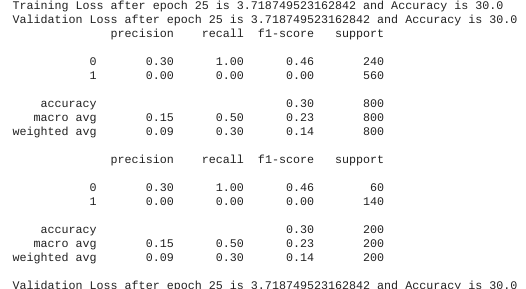

# Let us now compare the results to Deep_AutoViML which we will install now

In [ ]:
!pip install deep_autoviml

In [ ]:
from deep_autoviml import deep_autoviml as deepauto

In [ ]:
################################################################################
keras_model_type =  "fast" ## always try "fast", then "fast1", "fast2" and "auto"
### always set early_stopping to True first and then change it to False
#### You always need 15 max_trials to get something decent #####
keras_options = {"early_stopping": True, 'lr_scheduler': ''}  
#### always set tuner to "storm" and then "optuna". 
# NLP char limit kicks off NLP processing. Feature Cross later.
model_options = {'tuner':"storm", "max_trials": 5, 'nlp_char_limit':10,
                 'cat_feat_cross_flag':False, }
project_name = 'German_Credit' ### this is the folder where the model will be saved
################################################################################

In [ ]:
preds = df.columns[2:].tolist()
targets = df.columns[:1].tolist()
target = targets[0]
target

In [ ]:
train = pd.DataFrame(np.c_[x_train,y_train], index=range(len(x_train)), columns = preds+targets)
test = pd.DataFrame(np.c_[x_test,y_test], index=range(len(x_test)), columns = preds+targets)
print(train.shape, test.shape)
train.head(2)

In [ ]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

# You can see that Precision is 76% while Recall is 97% on the Validation dataset and overall accuracy is 76%
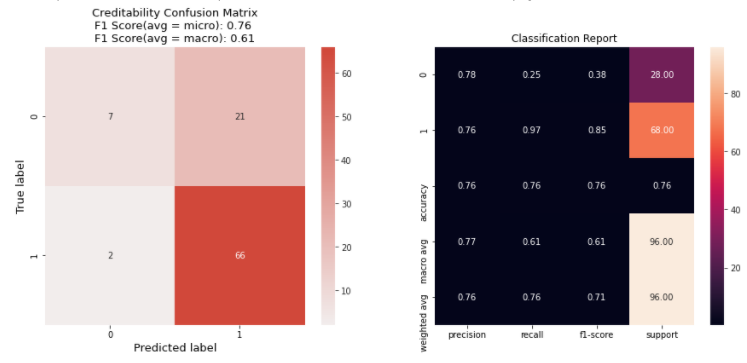

# Here is the Deep Learning model that it built:
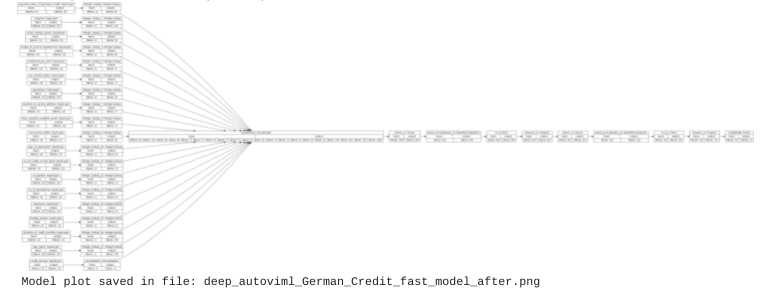

In [ ]:
predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)

In [ ]:
y_test = test[target].values
y_test[:4]

In [ ]:
y_preds = predictions[-1]
y_preds[:4]

## We will now test the model on the heldout test dataset. 
We can see that accuracy drops a bit since the dataset is too small and model probably overfit on such a small dataset. However, we can try other keras_model_type="fast1", "fast2" etc and see whether we can get better results

In [ ]:
from deep_autoviml import print_classification_model_stats
print_classification_model_stats(y_test, y_preds)

## The results on test set are similarly good
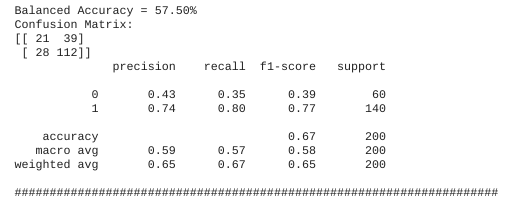

# Hope this notebook was helpful. If you liked it, pelase upvote Marilia Prata's Notebooks here:

XBNet Classifier on German Credit Data:
https://www.kaggle.com/mpwolke/xbnet-creditability

Deep_AutoViML on German Credit Data:
https://www.kaggle.com/mpwolke/creditability-deep-autoviml

